* Question 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

256


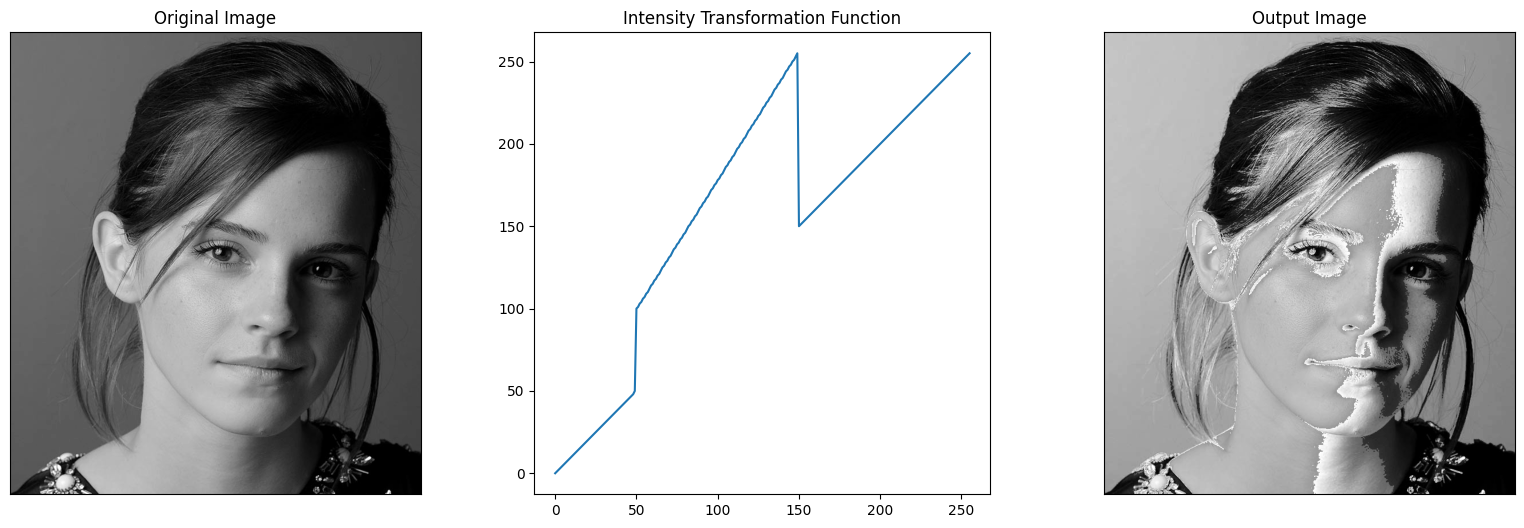

In [6]:
# Define the transformation
transform1 = np.concatenate((np.linspace(0, 50, 50), np.linspace(100, 255, 100), np.linspace(150, 255, 106)), axis=0).astype(np.uint8)
print(len(transform1))

# Read the image
image_orig = cv.imread('a1images\emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply the transformation
image_transformed = cv.LUT(image_orig, transform1)

# Display the images
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].imshow(image_orig, cmap = "gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Original Image")
ax[1].plot(transform1)
ax[1].set_title("Intensity Transformation Function")
ax[2].imshow(image_transformed, cmap = "gray", vmin=0, vmax=255)
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title("Output Image")
plt.show()

* Question 2
a)

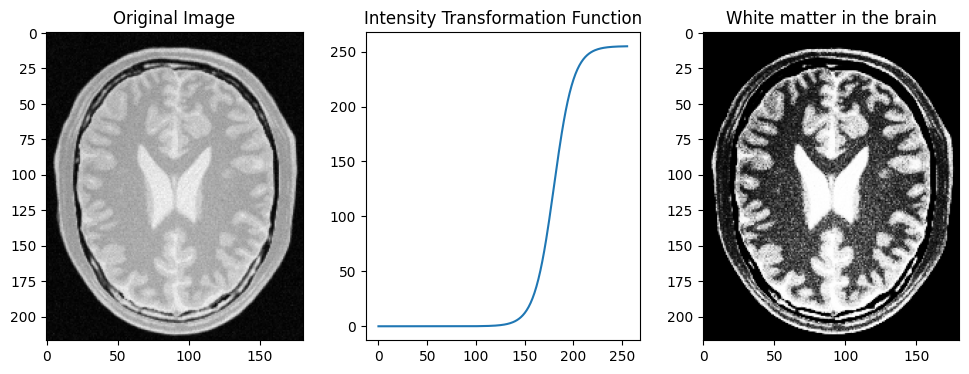

In [21]:
def white_matter_curve(x):
    #sigmoid function to map the intensity values for white matter
    aplpha = 0.1
    beta = 180
    curve = 255/(1+np.exp(-aplpha*(x-beta)))
    return curve

f = np.linspace(0,255,256)
transform2 = white_matter_curve(f)
fig2 = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

fig2_transformed_1 = cv.LUT(fig2, transform2)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(fig2, cmap = "gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].plot(transform2)
ax[1].set_title("Intensity Transformation Function")
ax[2].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[2].get_xaxis().set_visible(True)
ax[2].get_yaxis().set_visible(True)
ax[2].set_title("White matter in the brain")

plt.show()

b)

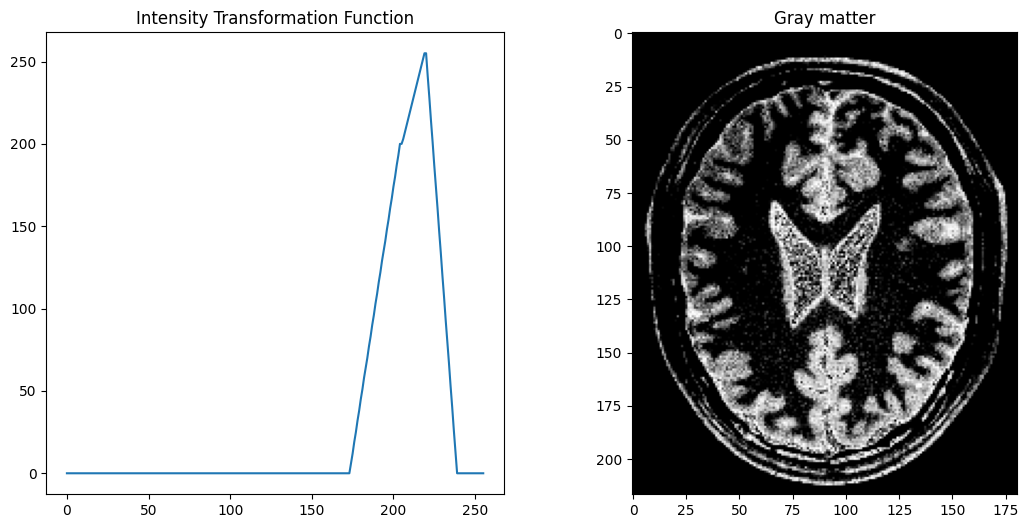

In [14]:
transform3 = np.concatenate((np.linspace(0, 0, 173), np.linspace(0, 200, 32), np.linspace(200, 255, 15),np.linspace(255, 0, 20),np.linspace(0, 0, 16)), axis=0).astype(np.uint8)
fig2 = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

fig2_transformed_1 = cv.LUT(fig2, transform3)
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
ax[0].plot(transform3)
ax[0].set_title("Intensity Transformation Function")
ax[1].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(True)
ax[1].get_yaxis().set_visible(True)
ax[1].set_title("Gray matter in the brain")

plt.show()

* Question 3

Text(0, 0.5, 'Frequency')

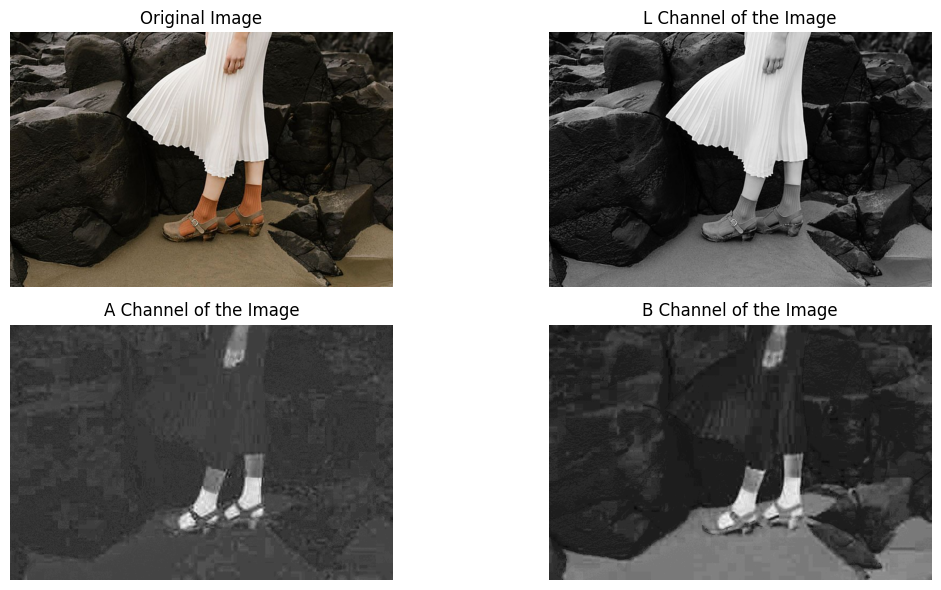

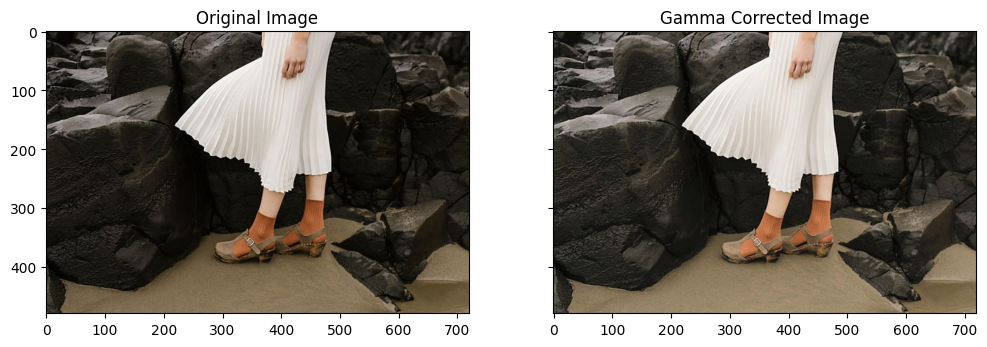

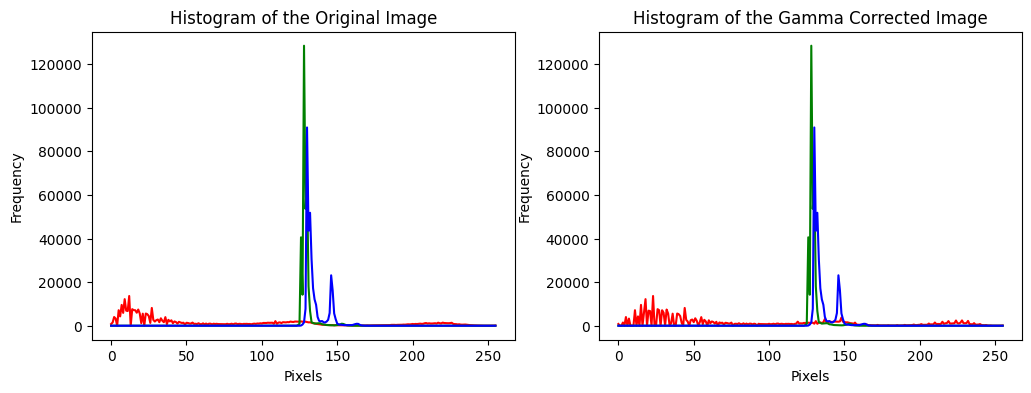

In [15]:
source_image = cv.imread('a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

rgb_image = cv.cvtColor(source_image, cv.COLOR_BGR2RGB)

img_ceilab = cv.cvtColor(source_image, cv.COLOR_BGR2Lab)        # Convert the image into CEILAB color space  
l_channel, a_channel, b_channel = cv.split(img_ceilab)      # Split the converted image into three channels     

#region
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(l_channel, cmap="gray")
plt.title('L Channel of the Image')
plt.axis('off')

plt.subplot(223)
plt.imshow(a_channel, cmap="gray")
plt.title('A Channel of the Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(b_channel, cmap="gray")
plt.title('B Channel of the Image')
plt.axis('off')

plt.tight_layout()
#endregion

gamma = 0.78
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
l_channel_gamma_corrected = cv.LUT(l_channel, table)        # Apply gamma correction only for L channel
img_gamma = cv.merge((l_channel_gamma_corrected, a_channel, b_channel))     # Merge L channel with other channels
img_corrected = cv.cvtColor(img_gamma, cv.COLOR_Lab2RGB)

#region
fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,6))
ax[0].imshow(rgb_image)
ax[0].set_title('Original Image')

ax[1].imshow(img_corrected)
ax[1].set_title('Gamma Corrected Image')
#endregion

f, ax = plt.subplots(1, 2, figsize=(12, 4))
space = ('l', 'a', 'b')
color = ('r', 'g', 'b')

for i, c in enumerate(space):
    hist_orig = cv.calcHist([img_ceilab], [i], None, [256], [0, 256])       # Calculate histogram for original image
    ax[0].plot(hist_orig, color=color[i])
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])       # Calculate histogram for gamma corrected image
    ax[1].plot(hist_gamma, color=color[i])

#region   
ax[0].set_title('Histogram of the Original Image')
ax[0].set_xlabel('Pixels')
ax[0].set_ylabel('Frequency')


ax[1].set_title('Histogram of the Gamma Corrected Image')
ax[1].set_xlabel('Pixels')
ax[1].set_ylabel('Frequency')

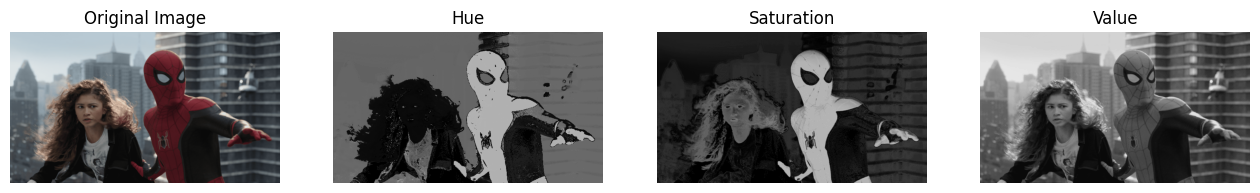

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('a1images\spider.png')
assert img is not None

#Convert the image to RBG since the img opens in BGR format
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#Convert the image to HSV
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)

#Split the image into Hue, Saturation and Value
img_hue, img_saturation, img_value = cv.split(img_hsv)

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].imshow(img_rgb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_hue, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Hue')
ax[2].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Saturation')
ax[3].imshow(img_value, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Value')
for a in ax:
    a.axis('off')

plt.show()

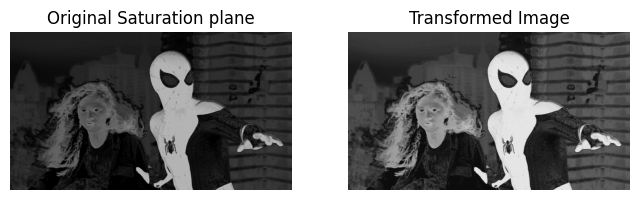

In [23]:
#Intensity transformation function

def IntensityTransformation(x):
    alpha = 0.5
    sigma = 70
    curve = x + alpha*128*(np.exp(-((x-128)**2)/(2*sigma**2)))
    return np.minimum(curve, 255)

#Get the curve
f = np.linspace(0,255,256)
y = IntensityTransformation(f)

#Apply the transformation function to the image
transformed_img = y[img_saturation]

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Saturation plane')
ax[1].imshow(transformed_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax:
    a.axis('off')
plt.show()

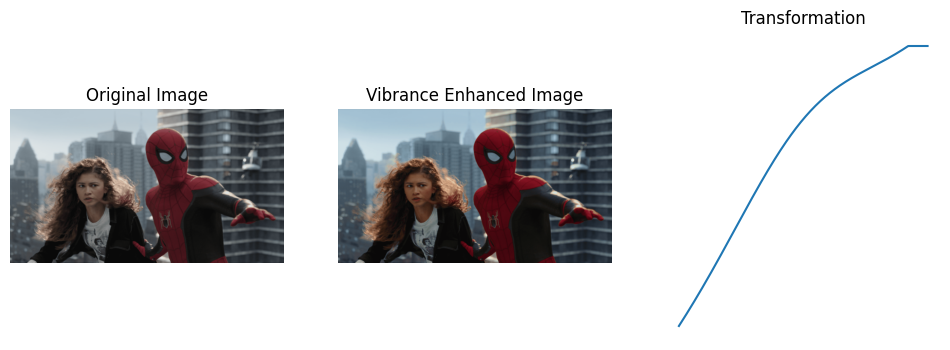

In [26]:
# Ensure all channels have the same dimensions and data types
assert img_hue.shape == transformed_img.shape == img_value.shape, "Channel dimensions do not match"
transformed_img = transformed_img.astype(img_hue.dtype)  # Ensure data types match
assert img_hue.dtype == transformed_img.dtype == img_value.dtype, "Channel data types do not match"

#Recombine the image
hsv_merged = cv.merge([img_hue, transformed_img, img_value])
assert hsv_merged is not None
#Convert the image back to RGB
img_converted_rgb = cv.cvtColor(hsv_merged, cv.COLOR_HSV2RGB)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(img_rgb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_converted_rgb, cmap='hsv', vmin=0, vmax=255)
ax[1].set_title('Vibrance Enhanced Image')
ax[2].plot(y)
ax[2].set_title('Transformation')
ax[2].get_xaxis().set_visible(True)
ax[2].get_yaxis().set_visible(True)
for a in ax:
    a.axis('off')

plt.show()